In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



plt.rcParams['figure.figsize']=(16,12)
plt.rcParams['figure.dpi']=250
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
em=pd.read_csv("temperature_data.csv")

# Outlier Detection

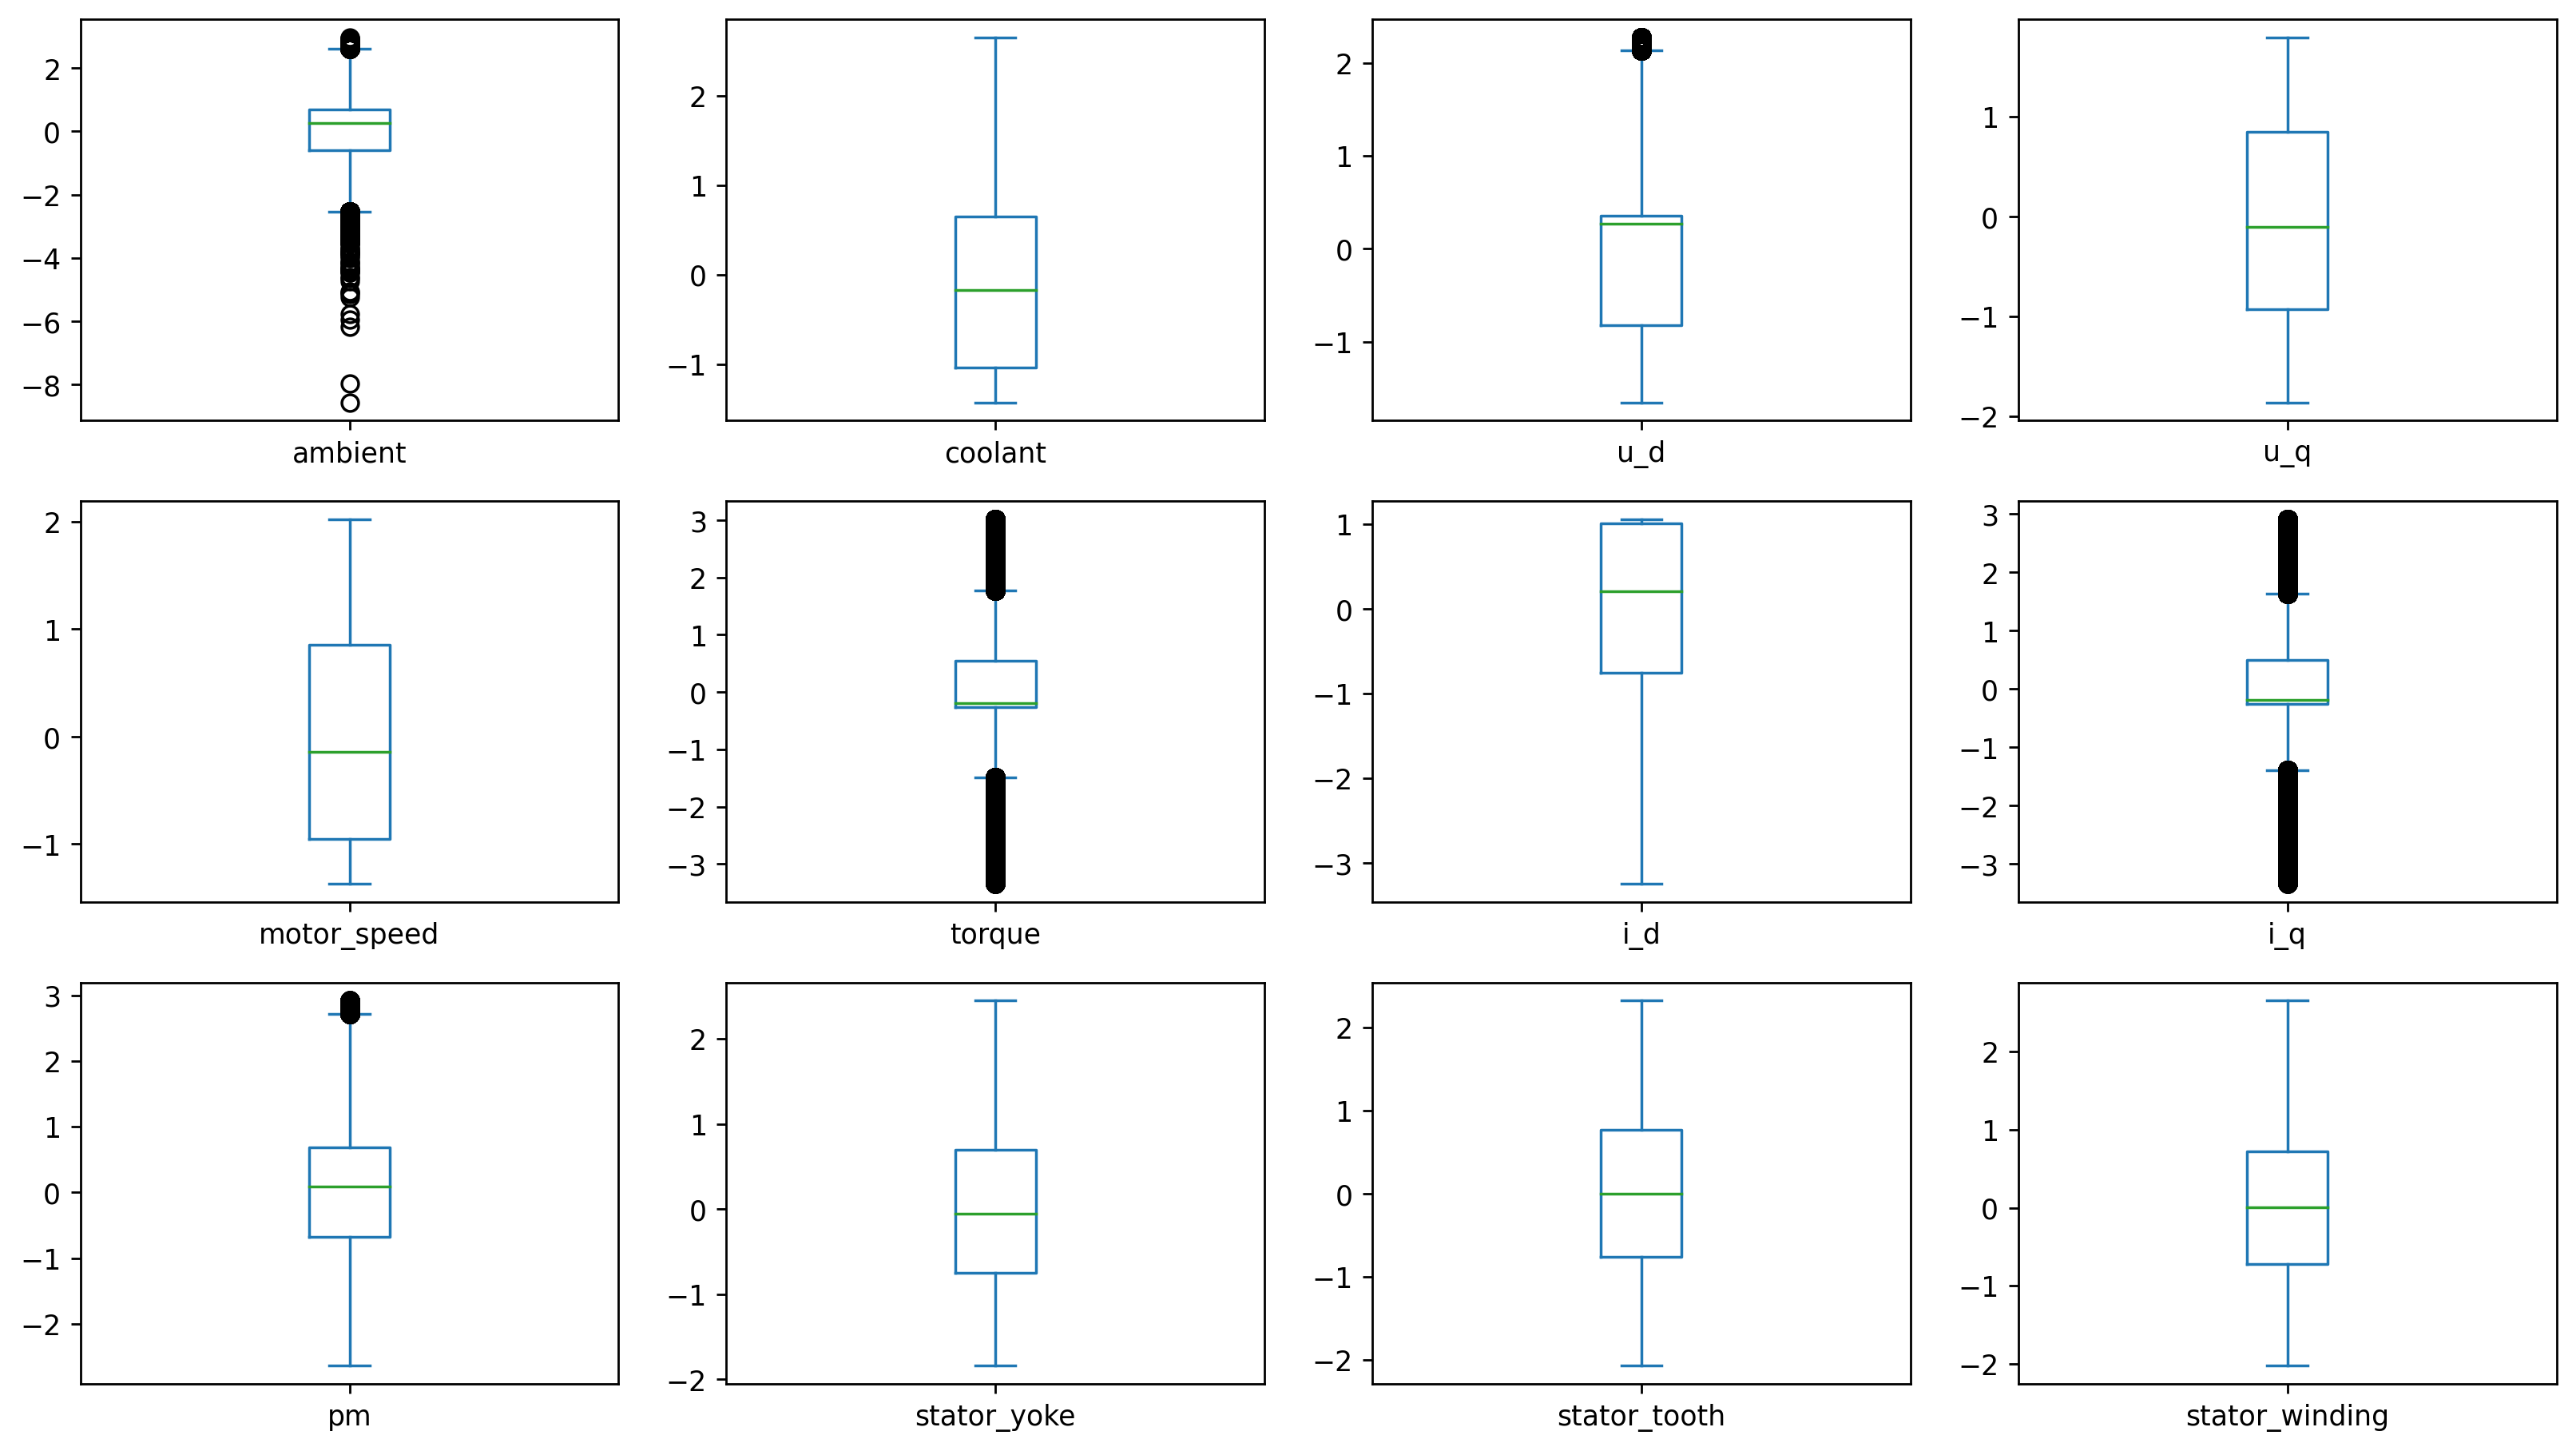

In [3]:
#from seaborn.axisgrid import share_axis
em.iloc[:,:-1].plot(kind='box',subplots=True,layout=(4,4))
plt.show()

### Observation:

"Ambient" , "torque" and "i_q" features has the outliers on both the ends

"pm" and "u_d" has outliers on the top end

# Transforming the features pm and u_d

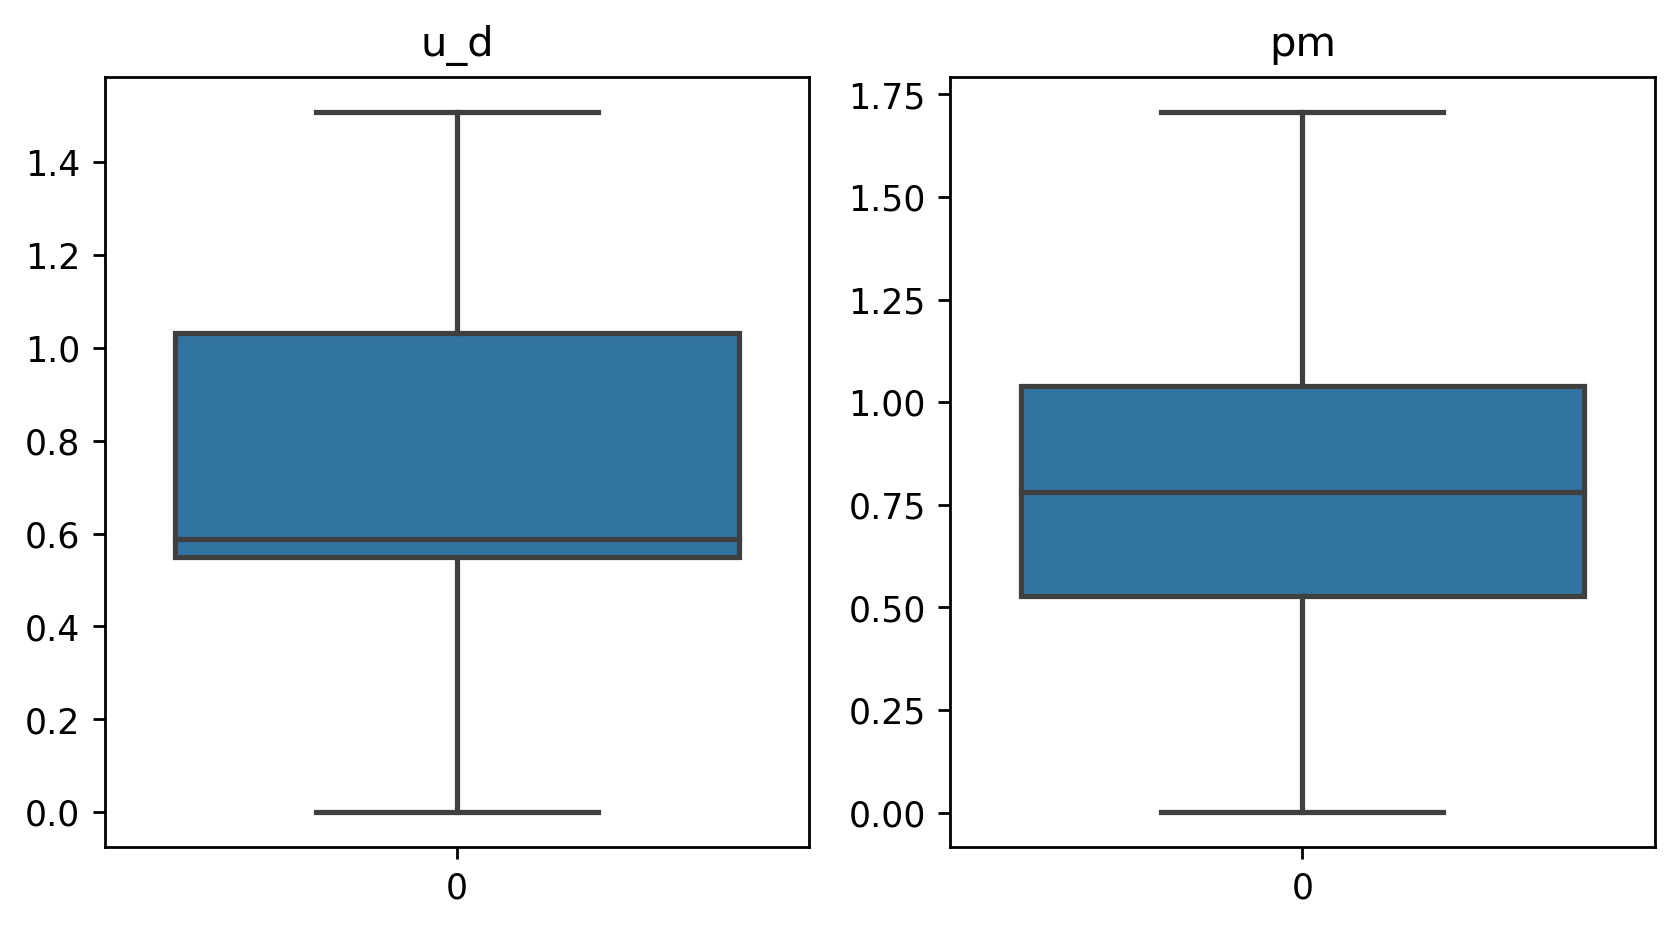

In [4]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.boxplot(np.sqrt(em['u_d']))
plt.title("u_d")

plt.subplot(1,2,2)
sns.boxplot(np.sqrt(em['pm']))
plt.title('pm')
plt.show()

In [5]:
# Transforming the features u_d amd pm
em['u_d']=np.sqrt(np.abs(em['u_d']))
em['pm']=np.sqrt(np.abs(em['pm']))

Hence the outliers in the tge featurs pm and u_d can be treated by applying square root them

### Outliers in the feature "ambient"

In [6]:
em['ambient'].describe()

count    998070.000000
mean         -0.003905
std           0.993127
min          -8.573954
25%          -0.599385
50%           0.266157
75%           0.686675
max           2.967117
Name: ambient, dtype: float64

In [7]:
#Quartile 1
q1_am=em['ambient'].quantile(0.25)
print('Quatile 1:',q1_am)

#median
med_am=em['ambient'].median()
print("Median",med_am)

#Quartile 3
q3_am=em['ambient'].quantile(0.75)
print('Quatile 3:',q3_am)

#Interquartile Range
print("Inter quartile Range: ",q3_am-q1_am)

#Upper limit
upp_am=q3_am+1.5*(q3_am-q1_am)
print('Upper Limit: ',upp_am)

#Lower limit
low_am=q1_am-1.5*(q3_am-q1_am)
print('Lower Limit: ',low_am)

Quatile 1: -0.59938534
Median 0.26615727
Quatile 3: 0.68667525
Inter quartile Range:  1.28606059
Upper Limit:  2.615766135
Lower Limit:  -2.528476225


In [8]:
# outliers in ambient
em[(em['ambient'] > upp_am) | (em['ambient'] < low_am)]

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
36414,-3.698899,-1.288667,1.061285,0.746681,1.483029,0.350814,-1.078798,0.304409,0.377016,-0.702812,-0.224093,0.016168,6
36415,-2.890745,-1.233934,1.062148,0.746986,1.483026,0.350116,-1.076931,0.304828,0.376804,-0.711858,-0.223980,0.016681,6
51062,2.628669,1.012596,1.080498,0.707446,1.483026,0.341965,-0.990900,0.312922,1.384212,1.327616,1.436676,1.261606,6
51063,2.677169,1.012875,1.080018,0.710380,1.483027,0.342024,-0.992531,0.312802,1.384194,1.328415,1.437837,1.261606,6
51064,2.710575,1.013156,1.079220,0.710822,1.483030,0.342076,-0.993092,0.312795,1.384084,1.328737,1.435991,1.261606,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
947783,-2.780729,0.054789,0.975584,0.121202,-0.411380,-1.049816,0.731651,-1.152319,0.469419,0.226847,0.027929,-0.121295,80
989728,-4.401607,-0.993057,1.003402,1.239116,1.941937,-0.609125,-0.938995,-0.572928,0.619900,-0.734715,-0.761953,-0.723739,72
989729,-5.239872,-1.078828,0.883778,1.368994,1.937356,-0.512008,-0.865224,-0.484981,0.613163,-0.734718,-0.761952,-0.719982,72
989730,-3.794825,-0.925217,0.888781,1.437498,1.919266,-0.509178,-0.816840,-0.484278,0.613053,-0.734720,-0.761952,-0.716570,72


### Outliers the feature "torque"

In [9]:
em['torque'].describe()

count    998070.000000
mean         -0.003333
std           0.997907
min          -3.345953
25%          -0.266917
50%          -0.187246
75%           0.547171
max           3.016971
Name: torque, dtype: float64

In [10]:
#Quartile 1
q1_tq=em['torque'].quantile(0.25)
print('Quatile 1:',q1_tq)

#median
med_tq=em['torque'].median()
print("Median",med_tq)

#Quartile 3
q3_tq=em['torque'].quantile(0.75)
print('Quatile 3:',q3_tq)

#Interquartile Range
print("Inter quartile Range: ",q3_tq-q1_tq)

#Upper limit
upp_tq=q3_tq+1.5*(q3_tq-q1_tq)
print('Upper Limit: ',upp_tq)

#Lower limit
low_tq=q1_tq-1.5*(q3_tq-q1_tq)
print('Lower Limit: ',low_tq)

Quatile 1: -0.26691731
Median -0.187246405
Quatile 3: 0.5471705375
Inter quartile Range:  0.8140878475
Upper Limit:  1.76830230875
Lower Limit:  -1.48804908125


In [11]:
# outliers in torque
em[(em['torque'] > upp_tq) | (em['torque'] < low_tq)]

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
21866,0.178197,-1.039129,1.195779,0.143142,-0.140194,1.805365,-0.550764,1.804135,0.997622,-1.048834,-0.956398,-0.840712,4
21867,0.188737,-1.038939,1.203079,0.084695,-0.140207,1.851083,-0.655085,1.829651,0.996417,-1.049665,-0.955986,-0.840239,4
21868,0.190470,-1.038745,1.208127,0.041574,-0.140221,1.884829,-0.730354,1.847858,0.996423,-1.049113,-0.955587,-0.840638,4
21869,0.183608,-1.038594,1.211847,0.012954,-0.140227,1.908084,-0.782559,1.861291,0.997510,-1.048540,-0.954973,-0.839896,4
21870,0.157341,-1.038120,1.214595,-0.008134,-0.140232,1.924696,-0.820640,1.870705,0.998422,-1.048188,-0.954761,-0.833907,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
996944,-0.090349,1.467437,1.241709,-0.306945,-0.100102,2.023551,-1.320537,1.905669,0.629888,0.947631,0.590806,0.390670,72
996945,-0.087831,1.467205,1.222549,-0.147875,-0.103248,1.909894,-1.033898,1.842245,0.630696,0.948052,0.589336,0.404920,72
996946,-0.087041,1.467107,1.188015,-0.001195,-0.123421,1.774533,-0.728379,1.761109,0.625480,0.948846,0.595167,0.409733,72
996958,-0.073209,1.468469,1.257297,-0.597769,0.090476,1.773663,-1.814173,1.584859,0.635992,0.951156,0.634828,0.482969,72


### Outliers in the feature "i_q"

In [12]:
em['i_q'].describe()

count    998070.000000
mean         -0.003194
std           0.997912
min          -3.341639
25%          -0.257269
50%          -0.190076
75%           0.499260
max           2.914185
Name: i_q, dtype: float64

In [13]:
#Quartile 1
q1_iq=em['i_q'].quantile(0.25)
print('Quatile 1:',q1_iq)

#median
med_iq=em['i_q'].median()
print("Median",med_iq)

#Quartile 3
q3_iq=em['i_q'].quantile(0.75)
print('Quatile 3:',q3_iq)

#Interquartile Range
print("Inter quartile Range: ",q3_iq-q1_iq)

#Upper limit
upp_iq=q3_iq+1.5*(q3_iq-q1_iq)
print('Upper Limit: ',upp_iq)

#Lower limit
low_iq=q1_iq-1.5*(q3_iq-q1_iq)
print('Lower Limit: ',low_iq)

Quatile 1: -0.25726893
Median -0.19007564
Quatile 3: 0.499260005
Inter quartile Range:  0.756528935
Upper Limit:  1.6340534075
Lower Limit:  -1.3920623324999999


In [14]:
# outliers in i_q
em[(em['i_q'] > upp_iq) | (em['i_q'] < low_iq)]

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
21864,0.161408,-1.039413,1.170354,0.332740,-0.140144,1.652162,-0.211306,1.716715,0.998670,-1.047198,-0.955745,-0.840746,4
21865,0.167563,-1.039304,1.185459,0.224611,-0.140177,1.741364,-0.405197,1.768402,0.998696,-1.048213,-0.956002,-0.839932,4
21866,0.178197,-1.039129,1.195779,0.143142,-0.140194,1.805365,-0.550764,1.804135,0.997622,-1.048834,-0.956398,-0.840712,4
21867,0.188737,-1.038939,1.203079,0.084695,-0.140207,1.851083,-0.655085,1.829651,0.996417,-1.049665,-0.955986,-0.840239,4
21868,0.190470,-1.038745,1.208127,0.041574,-0.140221,1.884829,-0.730354,1.847858,0.996423,-1.049113,-0.955587,-0.840638,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
996945,-0.087831,1.467205,1.222549,-0.147875,-0.103248,1.909894,-1.033898,1.842245,0.630696,0.948052,0.589336,0.404920,72
996946,-0.087041,1.467107,1.188015,-0.001195,-0.123421,1.774533,-0.728379,1.761109,0.625480,0.948846,0.595167,0.409733,72
996947,-0.087490,1.467103,1.160460,0.119788,-0.133122,1.656240,-0.490892,1.683066,0.627518,0.949520,0.600832,0.422693,72
996968,-0.097792,1.469093,1.208085,-0.003418,-0.042669,1.687300,-0.824238,1.648718,0.634056,0.951220,0.659405,0.536917,72


Rows with all the 3 columns as outliers

In [15]:
em[((em['ambient'] > upp_am) | (em['ambient'] < low_am)) & ((em['torque'] > upp_tq) | (em['torque'] < low_tq)) & ((em['i_q'] > upp_iq) | (em['i_q'] < low_iq))]

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
140987,-2.528755,-1.081652,0.684669,-0.705653,-0.816644,2.346665,-0.840854,2.287214,1.602752,-1.811009,-2.044912,-1.943843,27
140988,-2.573248,-1.082766,0.684904,-0.705758,-0.816637,2.347607,-0.841913,2.288289,1.601016,-1.809246,-2.045580,-1.947192,27
140989,-2.616157,-1.083149,0.685035,-0.705827,-0.816631,2.348552,-0.842691,2.289057,1.600975,-1.808056,-2.046059,-1.945443,27
140990,-2.623506,-1.083525,0.685214,-0.705959,-0.816624,2.348962,-0.843233,2.289609,1.602121,-1.807859,-2.046433,-1.926543,27
140991,-2.624894,-1.084360,0.685351,-0.706006,-0.816619,2.349559,-0.843637,2.290001,1.601531,-1.807254,-2.046672,-1.905404,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
687773,-4.626428,0.670383,1.065575,-0.498816,-0.604978,-1.868322,0.168949,-1.980194,1.044170,2.299981,2.253757,2.123582,66
687774,-3.209129,1.101601,1.056123,-0.502377,-0.613185,-1.845840,0.186128,-1.958555,1.044451,2.299981,2.252175,2.123182,66
748063,-2.902579,0.715810,1.288743,-0.092576,-0.288940,-2.042247,0.047096,-2.149307,1.094648,2.001158,1.915756,1.833539,68
748064,-5.775765,-0.023468,1.313299,-0.054704,-0.254708,-2.064223,0.033541,-2.171030,1.094262,2.001533,1.916844,1.834165,68


In [16]:
# value counts of profile_id that contains outliers in all the 3 columns
em[((em['ambient'] > upp_am) | (em['ambient'] < low_am)) & ((em['torque'] > upp_tq) | (em['torque'] < low_tq)) & ((em['i_q'] > upp_iq) | (em['i_q'] < low_iq))]['profile_id'].value_counts()

36    4336
30    2530
32    1515
29    1074
27     219
44       3
68       3
50       2
56       2
66       2
48       1
53       1
59       1
Name: profile_id, dtype: int64

Rows with atleast 1 out of 3 columns containg outlier

In [17]:
#Rows with outliers
em[((em['ambient'] > upp_am) | (em['ambient'] < low_am)) | ((em['torque'] > upp_tq) | (em['torque'] < low_tq)) | ((em['i_q'] > upp_iq) | (em['i_q'] < low_iq))]


,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
21864,0.161408,-1.039413,1.170354,0.332740,-0.140144,1.652162,-0.211306,1.716715,0.998670,-1.047198,-0.955745,-0.840746,4
21865,0.167563,-1.039304,1.185459,0.224611,-0.140177,1.741364,-0.405197,1.768402,0.998696,-1.048213,-0.956002,-0.839932,4
21866,0.178197,-1.039129,1.195779,0.143142,-0.140194,1.805365,-0.550764,1.804135,0.997622,-1.048834,-0.956398,-0.840712,4
21867,0.188737,-1.038939,1.203079,0.084695,-0.140207,1.851083,-0.655085,1.829651,0.996417,-1.049665,-0.955986,-0.840239,4
21868,0.190470,-1.038745,1.208127,0.041574,-0.140221,1.884829,-0.730354,1.847858,0.996423,-1.049113,-0.955587,-0.840638,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
996947,-0.087490,1.467103,1.160460,0.119788,-0.133122,1.656240,-0.490892,1.683066,0.627518,0.949520,0.600832,0.422693,72
996958,-0.073209,1.468469,1.257297,-0.597769,0.090476,1.773663,-1.814173,1.584859,0.635992,0.951156,0.634828,0.482969,72
996959,-0.082149,1.469558,1.256073,-0.542964,0.077404,1.781270,-1.739067,1.600366,0.636271,0.951175,0.637024,0.480897,72
996968,-0.097792,1.469093,1.208085,-0.003418,-0.042669,1.687300,-0.824238,1.648718,0.634056,0.951220,0.659405,0.536917,72


There are 1,80,510 outliers totally present in the dataset after transforming u_d and pm columns.So we are not deleting those rowes but replacing the outliers greater than upper limit with the upper-limit and with lower limit for those data that are lesser than lower limit

### Treating Outlier

In [18]:
# Replacing outliers greater than upper-limit with the upper limit
em.loc[em['ambient']>=upp_am,'ambient']=upp_am

# Replacing outliers lower than lower-limit with the lower limit
em.loc[em['ambient']<=low_am,'ambient']=low_am

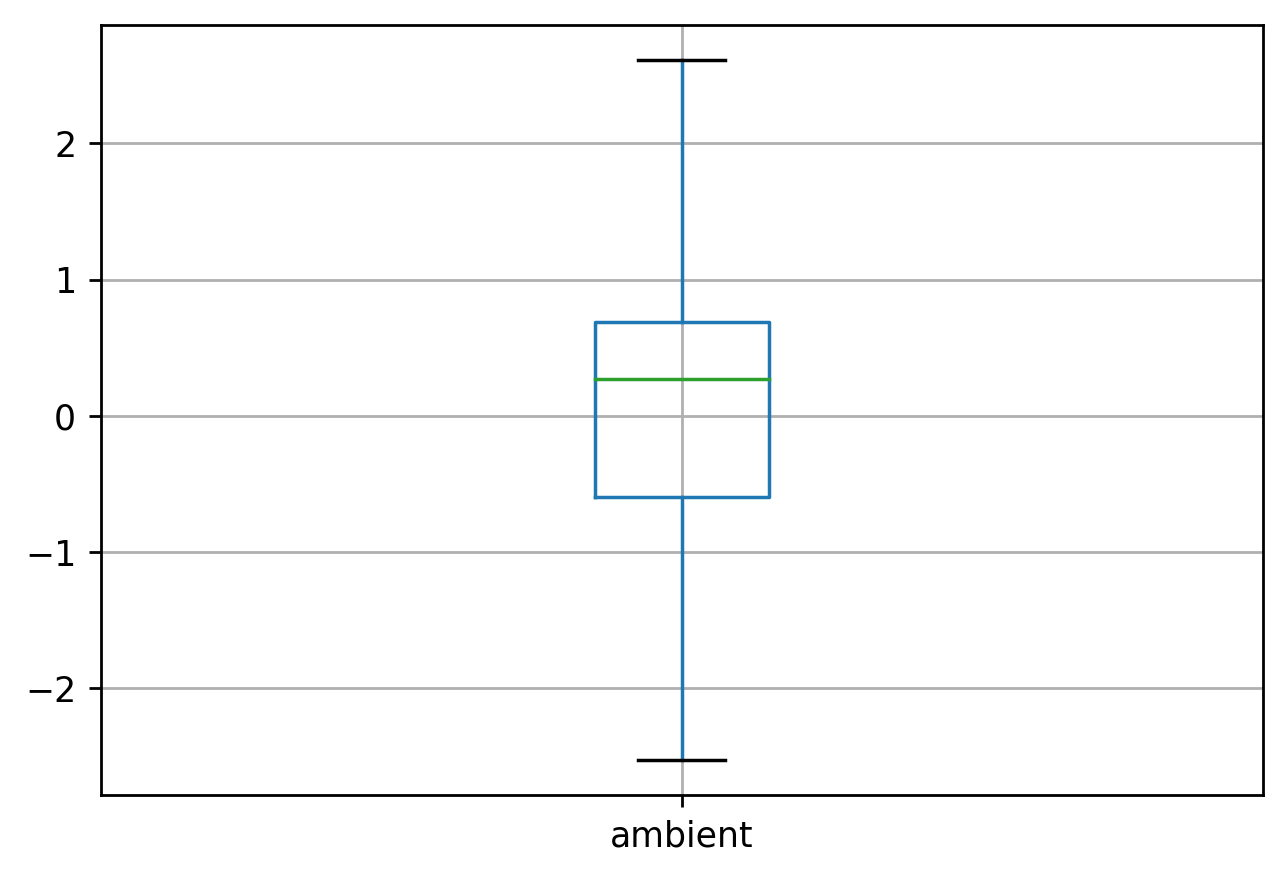

In [19]:
# Plotting the feature ambient
plt.figure(figsize=(6,4))
em.boxplot('ambient')
plt.show()

In [20]:
# Replacing outliers greater than upper-limit with the upper limit
em.loc[em['torque']>=upp_tq,'torque']=upp_tq

# Replacing outliers lower than lower-limit with the lower limit
em.loc[em['torque']<=low_tq,'torque']=low_tq

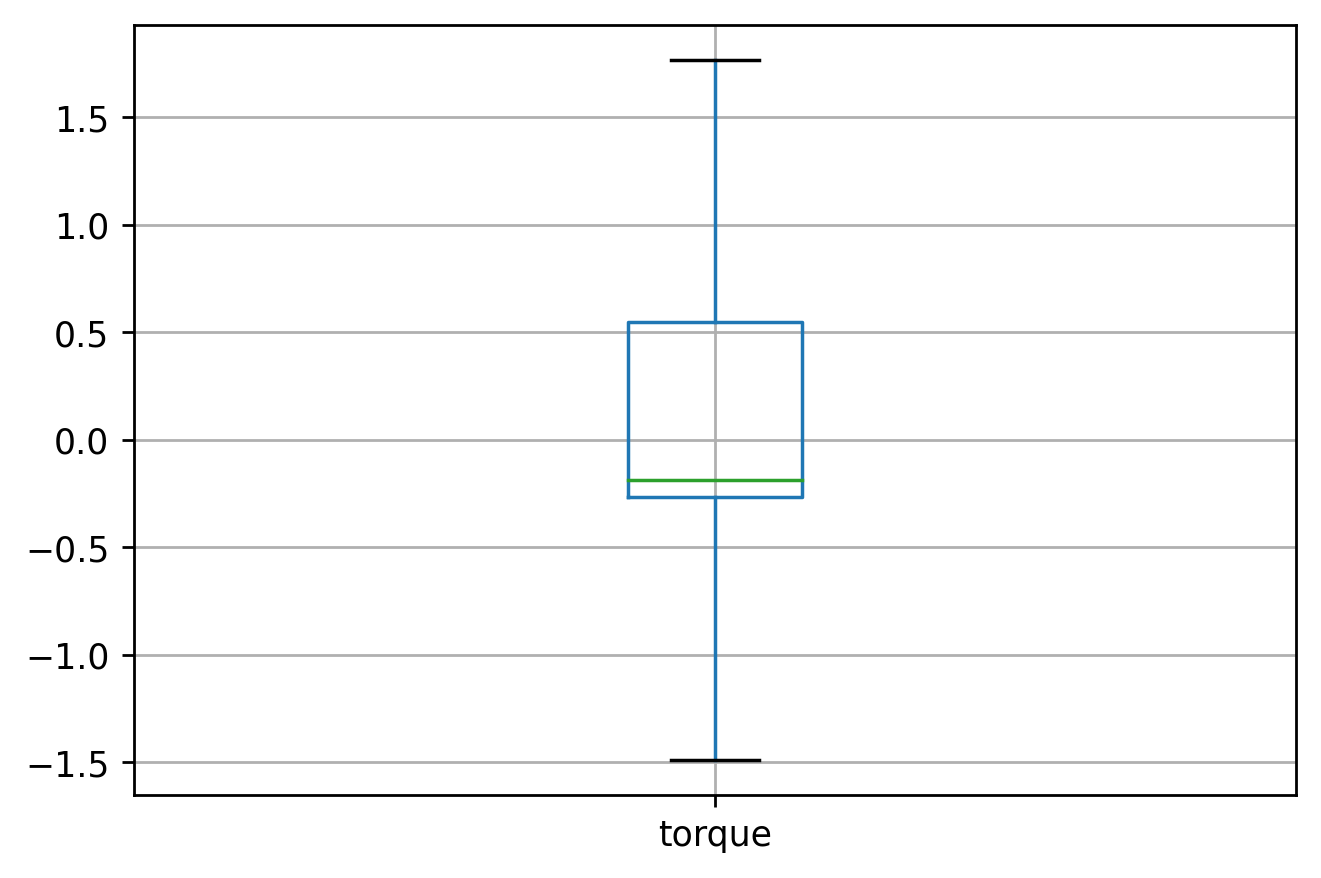

In [21]:
# Plotting the feature torque
plt.figure(figsize=(6,4))
em.boxplot('torque')
plt.show()

In [22]:
# Replacing outliers greater than upper-limit with the upper limit
em.loc[em['i_q']>=upp_iq,'i_q']=upp_iq

# Replacing outliers lower than lower-limit with the lower limit
em.loc[em['i_q']<=low_iq,'i_q']=low_iq

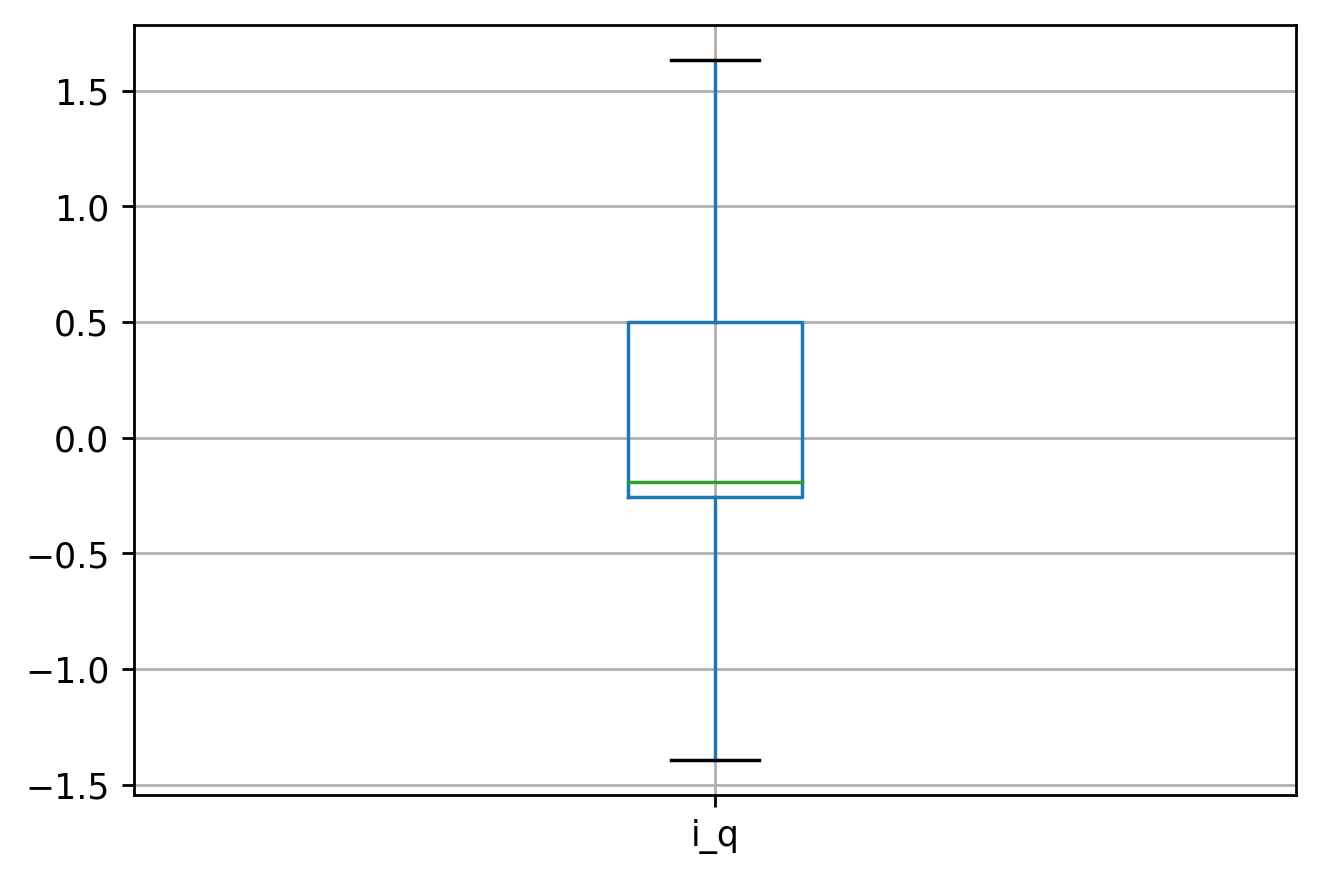

In [23]:
# Plotting the feature i_q
plt.figure(figsize=(6,4))
em.boxplot('i_q')
plt.show()

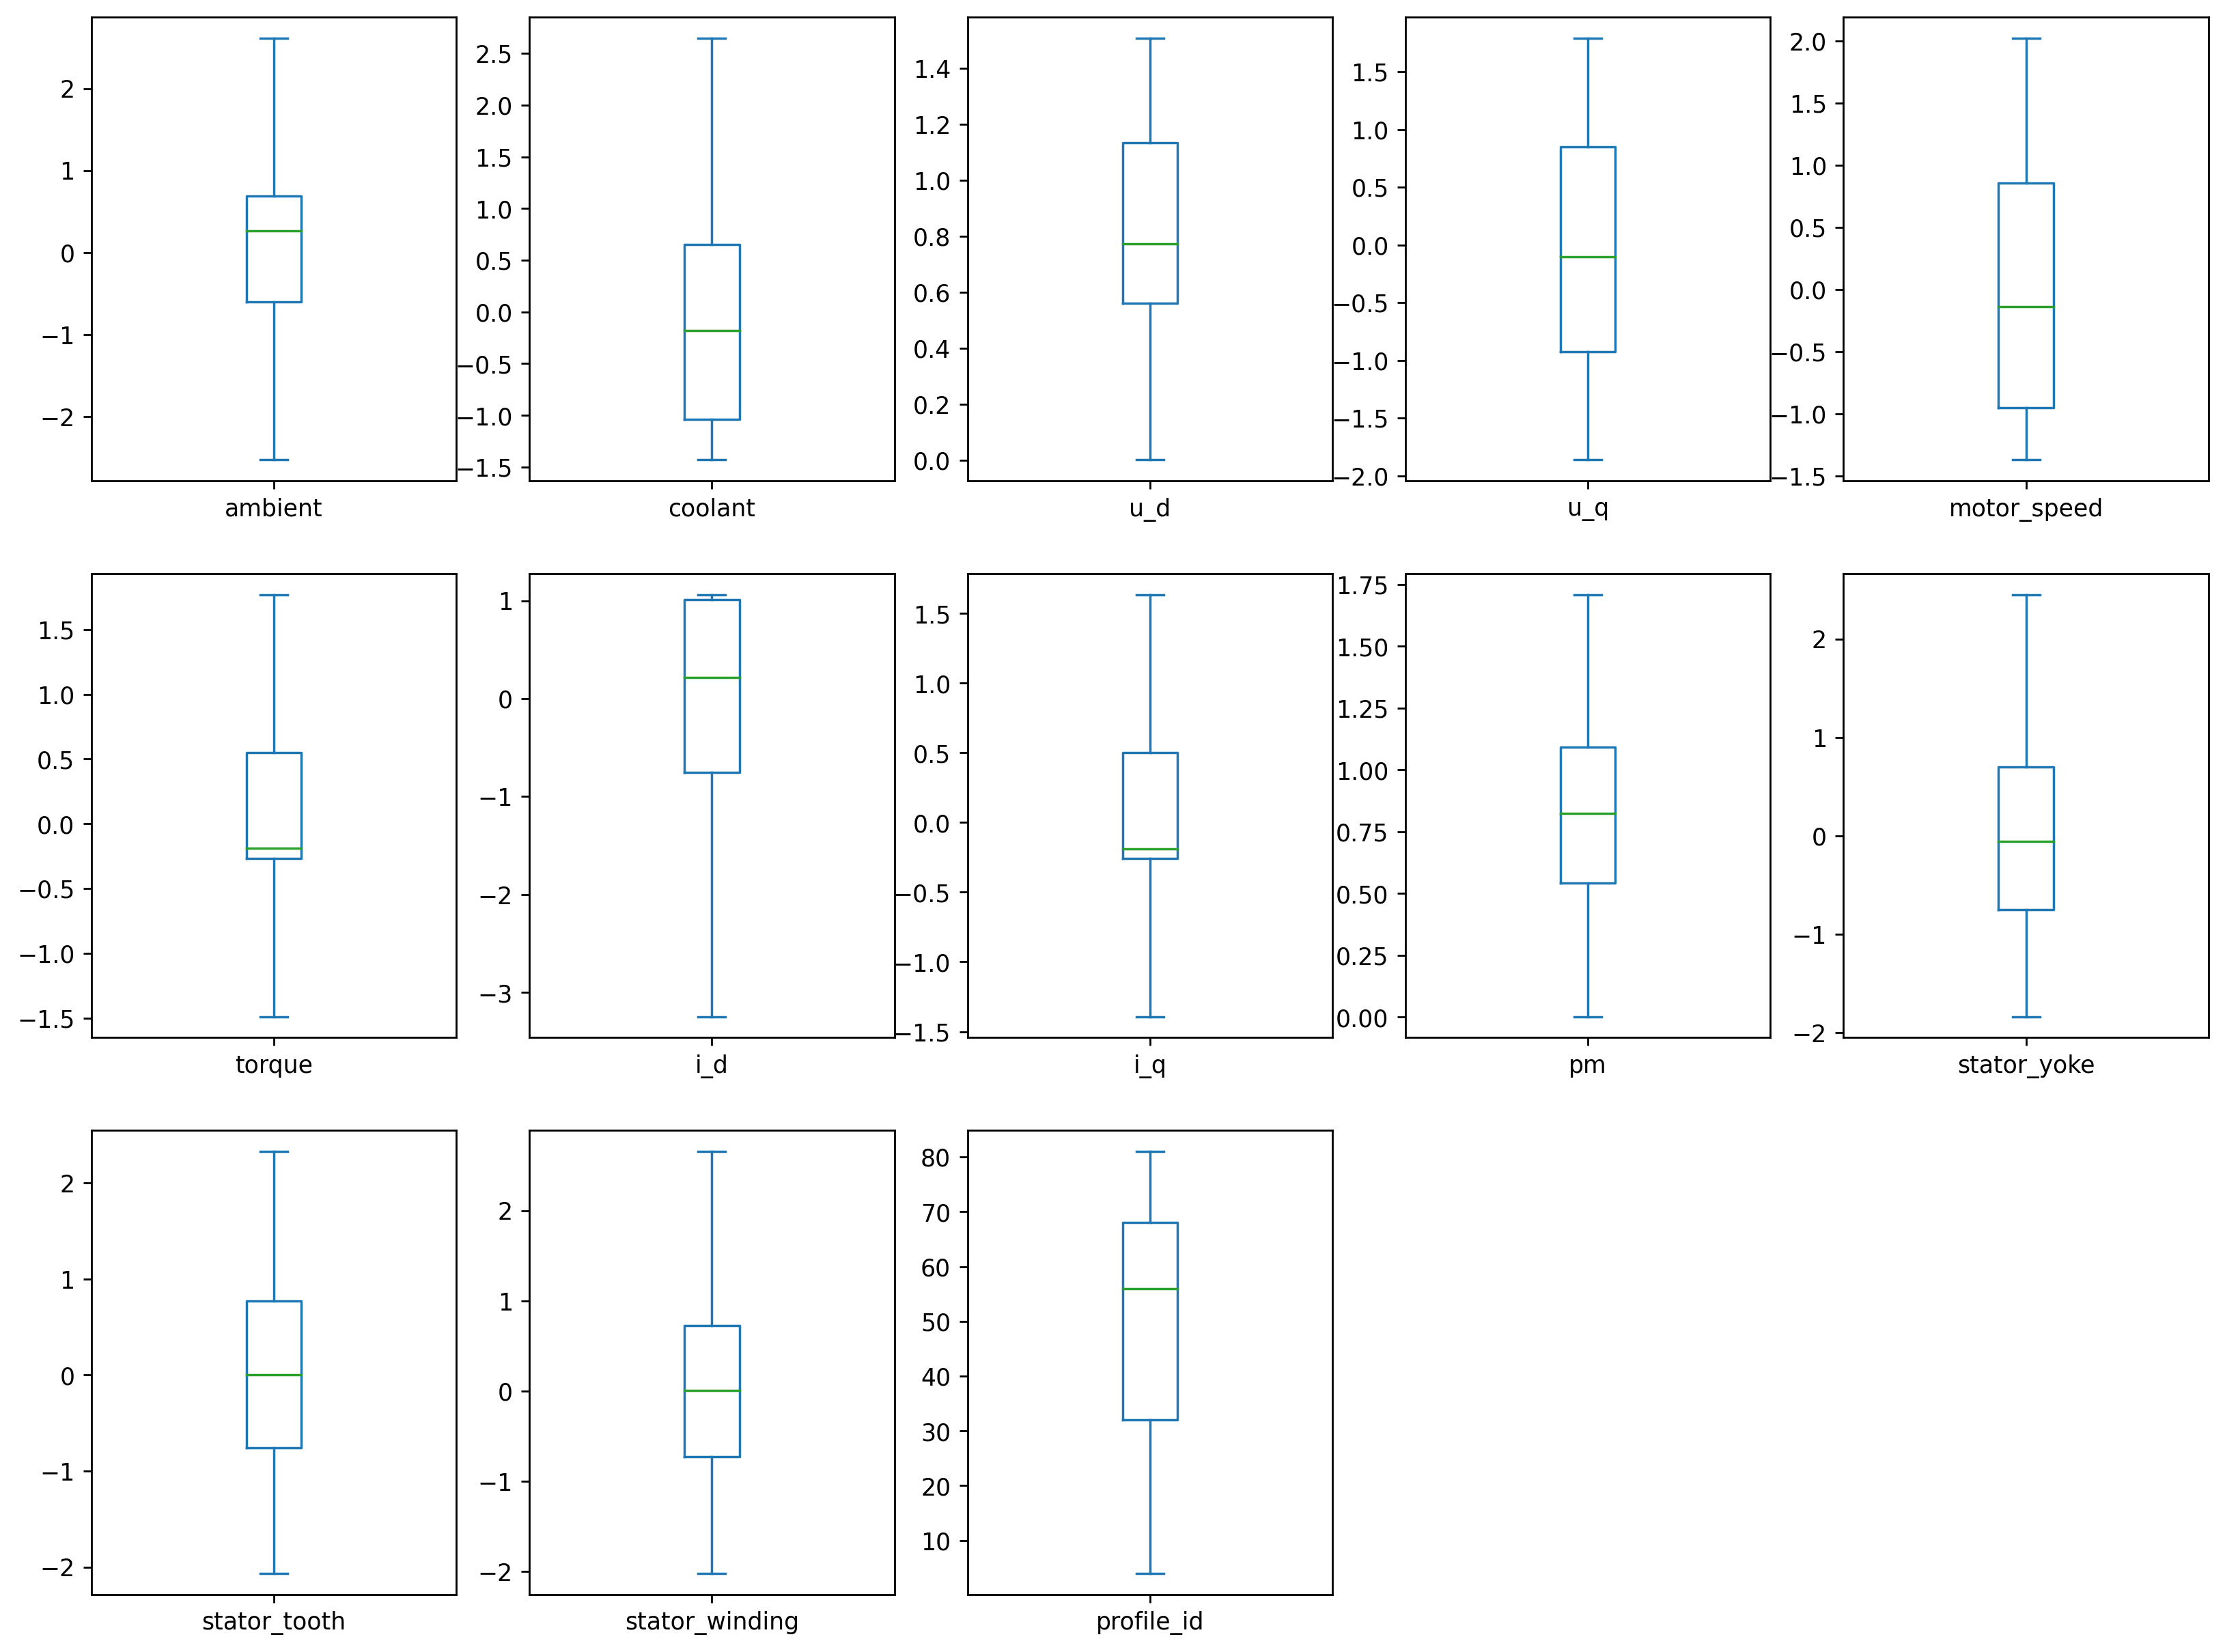

In [24]:
em.plot(kind='box',subplots=True,layout=(3,5))
plt.show()

There are no outliers present in the dataset after treating the outliers

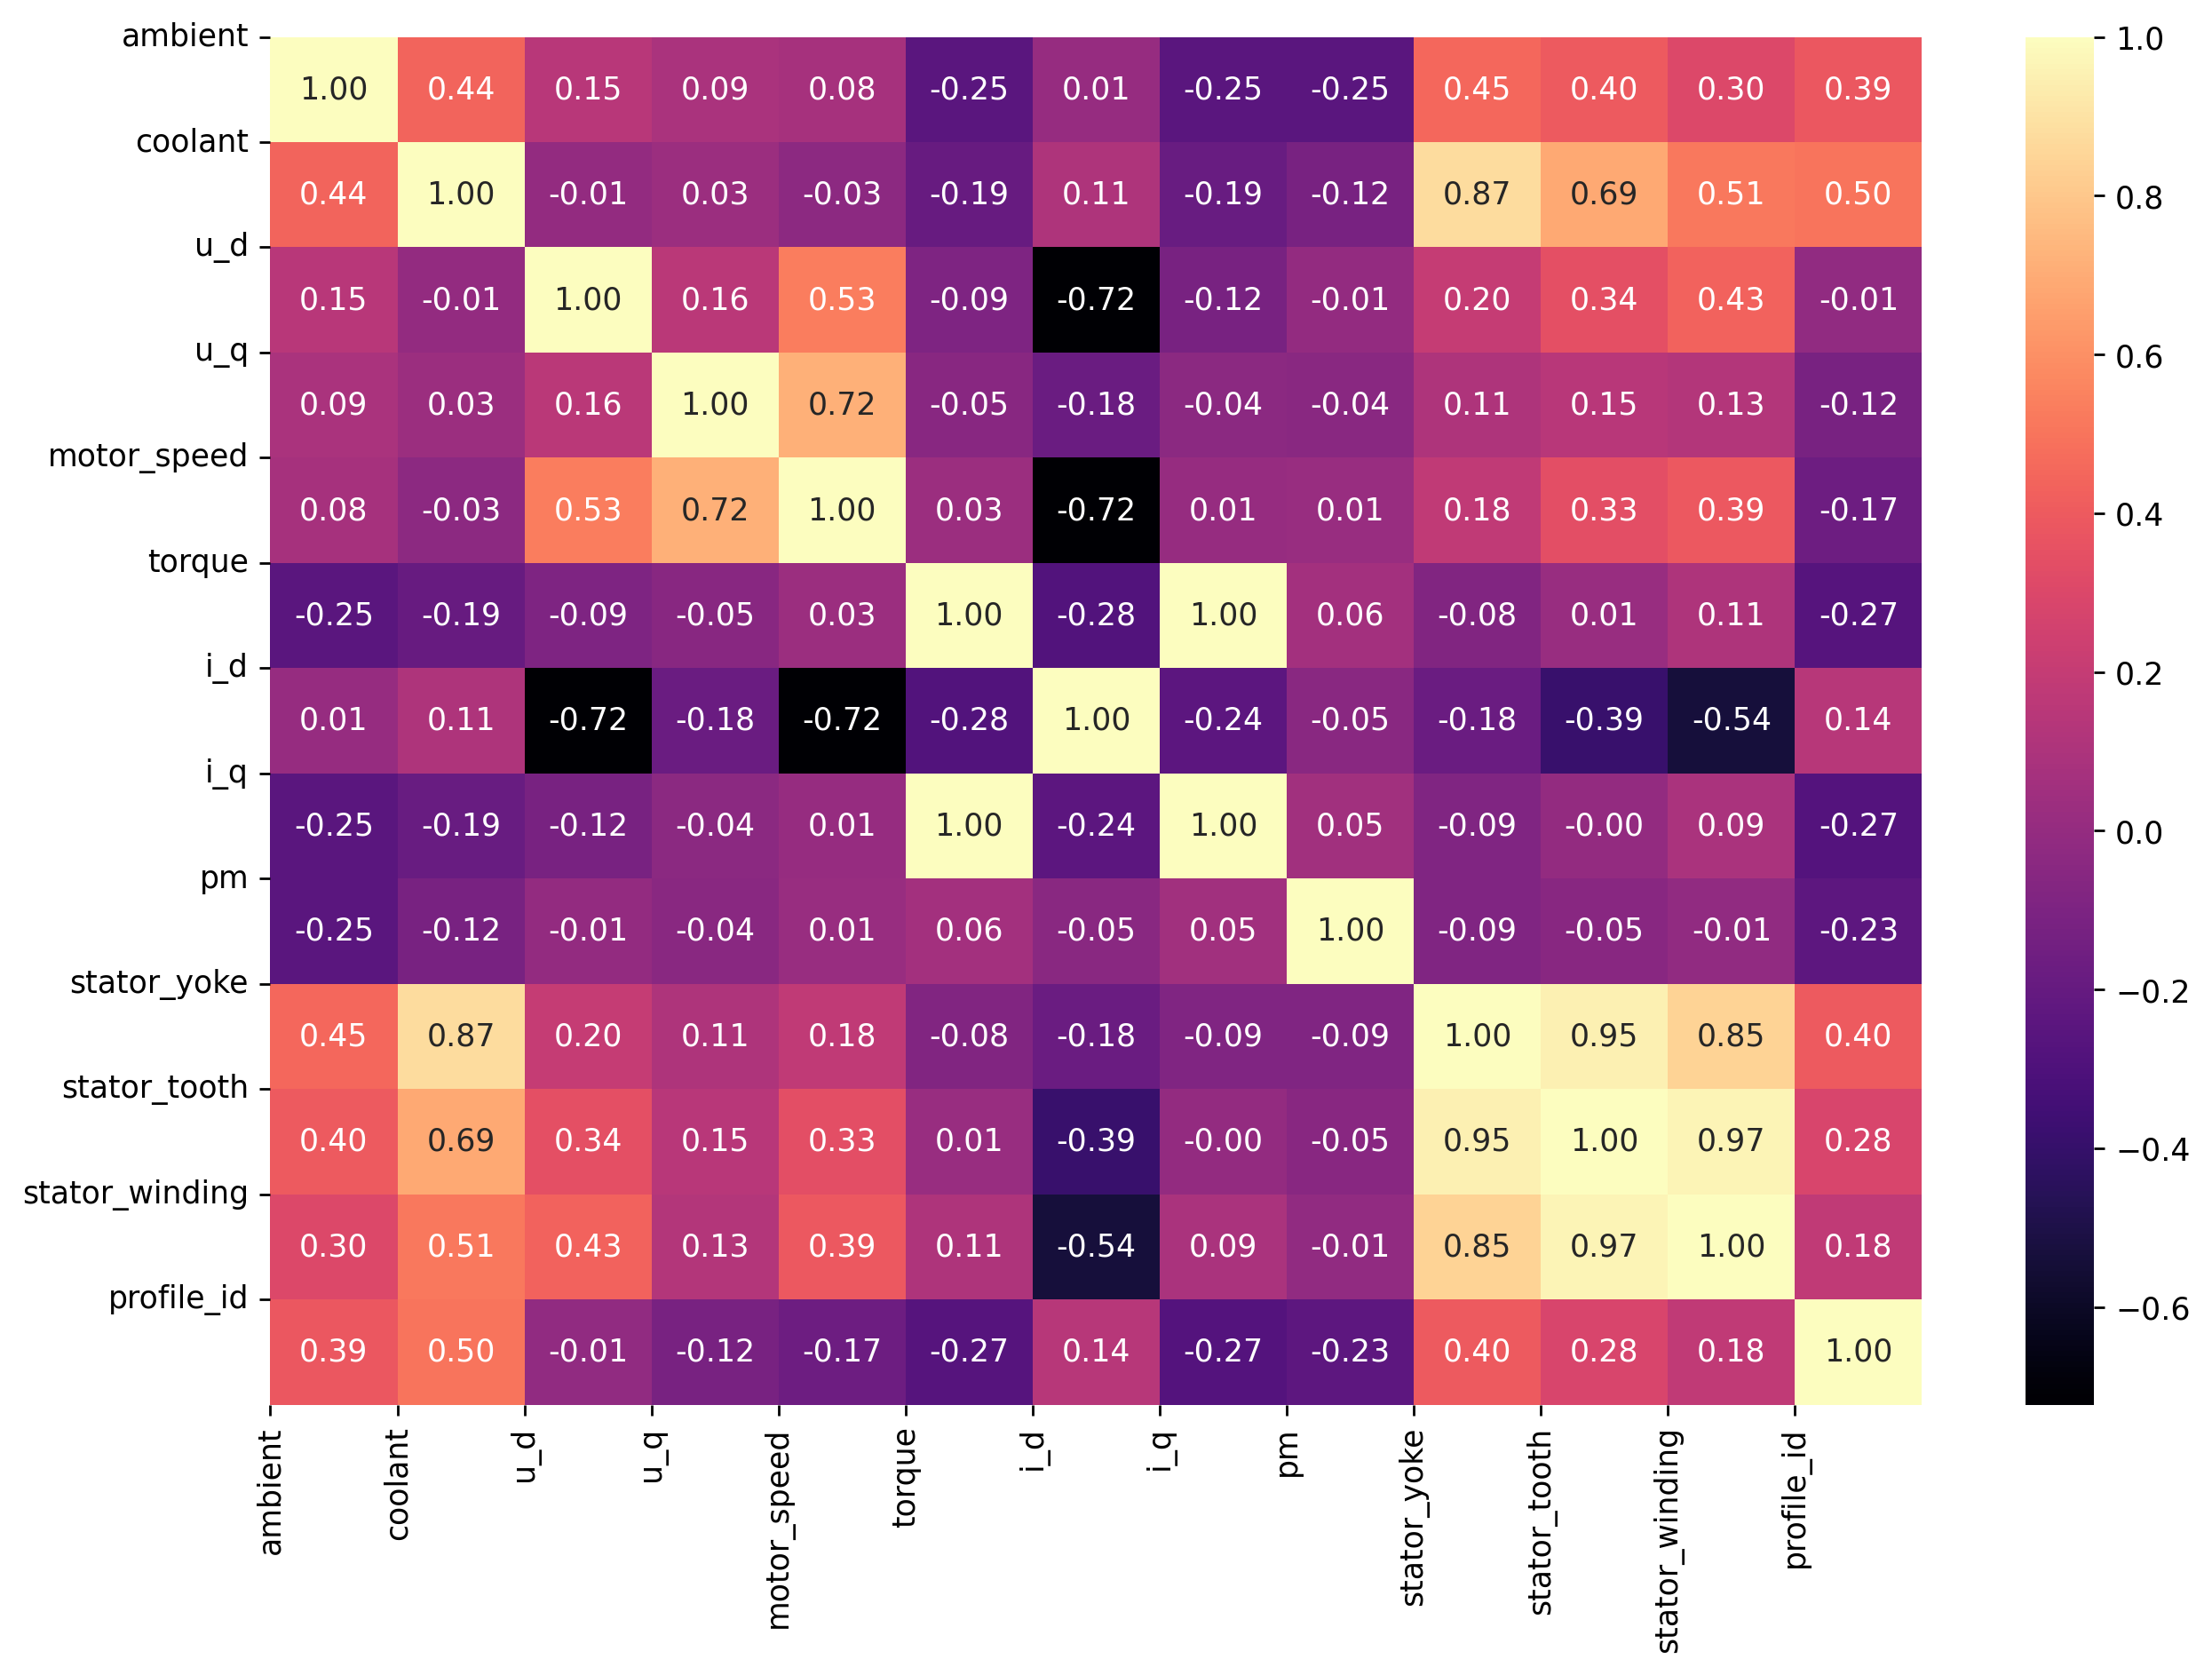

In [25]:
corr = em.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(12, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

#### Observation:
There is no much change in the correlation values after treating the outliers.

The independent features have high correlation values leading to multi-collinearity and only 2 features 'u_q' and 'i_d' are having significant correlations with the dependent feature 'motor_speed' 

##### To solve this problem we shall check for VIF.